In [2]:
# Import necessary libraries
import os
import urllib.request
!pip install rarfile
import rarfile
from PIL import Image
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import cv2 # image processing library
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# Import required dependencies for deep learning networks
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam, RMSprop, Adagrad
from keras.layers import BatchNormalization
from sklearn.metrics import classification_report,confusion_matrix
import tensorflow as tf
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, classification_report


In [ ]:
#!pip install scipy==1.11.4
#!pip install scikit-plot
import scikitplot.metrics as splt

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Dataset

In [3]:
# Download the dataset
url = "https://prod-dcd-datasets-cache-zipfiles.s3.eu-west-1.amazonaws.com/9brnm3c39k-1.zip"
filename = "CICS Dataset.zip"
urllib.request.urlretrieve(url, filename)


('CICS Dataset.zip', <http.client.HTTPMessage at 0x7fd03d6237f0>)

In [7]:
!unzip '/content/CICS Dataset.zip'

Archive:  /content/CICS Dataset.zip
  inflating: Cracks In Concrete Structures (CICS) Dataset/CICS Dataset.zip  


In [8]:
!unzip '/content/Cracks In Concrete Structures (CICS) Dataset/CICS Dataset.zip'

Streaming output truncated to the last 5000 lines.
  inflating: CICS/Simple Cracks/370.jpg  
  inflating: CICS/Simple Cracks/3700.jpg  
  inflating: CICS/Simple Cracks/3701.jpg  
  inflating: CICS/Simple Cracks/3702.jpg  
  inflating: CICS/Simple Cracks/3703.jpg  
  inflating: CICS/Simple Cracks/3704.jpg  
  inflating: CICS/Simple Cracks/3705.jpg  
  inflating: CICS/Simple Cracks/3706.jpg  
  inflating: CICS/Simple Cracks/3707.jpg  
  inflating: CICS/Simple Cracks/3708.jpg  
  inflating: CICS/Simple Cracks/3709.jpg  
  inflating: CICS/Simple Cracks/371.jpg  
  inflating: CICS/Simple Cracks/3710.jpg  
  inflating: CICS/Simple Cracks/3711.jpg  
  inflating: CICS/Simple Cracks/3712.jpg  
  inflating: CICS/Simple Cracks/3713.jpg  
  inflating: CICS/Simple Cracks/3714.jpg  
  inflating: CICS/Simple Cracks/3715.jpg  
  inflating: CICS/Simple Cracks/3716.jpg  
  inflating: CICS/Simple Cracks/3717.jpg  
  inflating: CICS/Simple Cracks/3718.jpg  
  inflating: CICS/Simple Cracks/3719.jpg  
  inf

In [9]:
# Specify the root directory and the subfolders
root_dir = "/content/CICS"
subfolders = ["Multibranched Crack", "Simple Cracks", "Without Crack"]

# Count the number of images in each class and display an example image
class_counts = Counter()
for subfolder in subfolders:
    class_dir = os.path.join(root_dir, subfolder)
    image_files = [f for f in os.listdir(class_dir) if f.endswith(('.png', '.jpg', '.jpeg'))]
    class_counts[subfolder] = len(image_files)

    # Display an example image
    example_image_file = image_files[0]
    example_image = Image.open(os.path.join(class_dir, example_image_file))
    example_image.show()

# Print the number of images in each class
for class_name, count in class_counts.items():
    print(f"Class {class_name}: {count} images")


Class Multibranched Crack: 4000 images
Class Simple Cracks: 4000 images
Class Without Crack: 4000 images


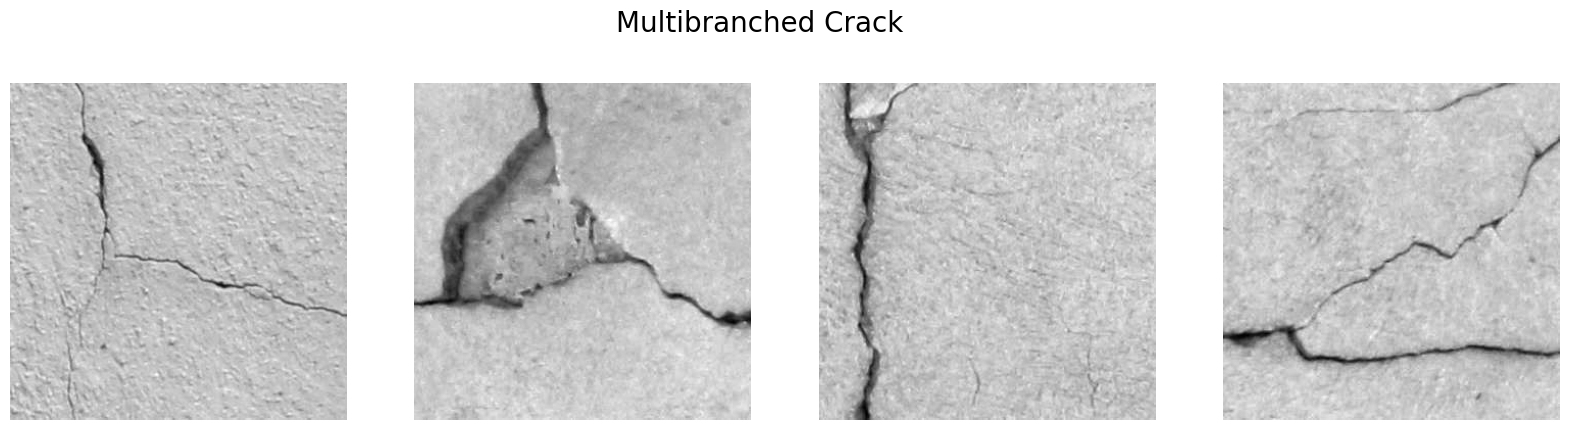

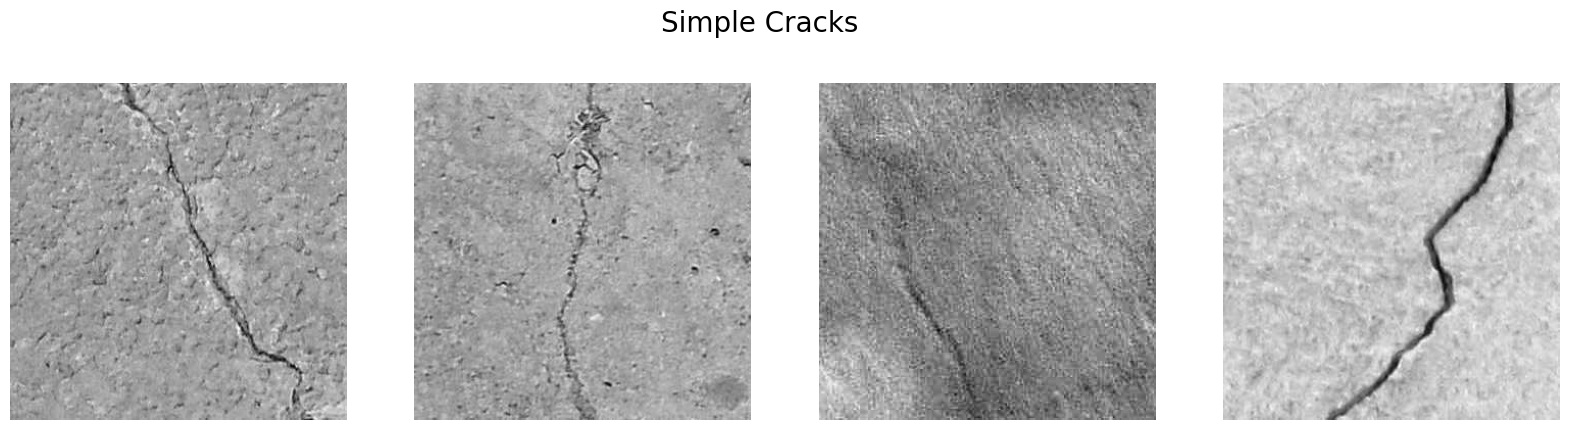

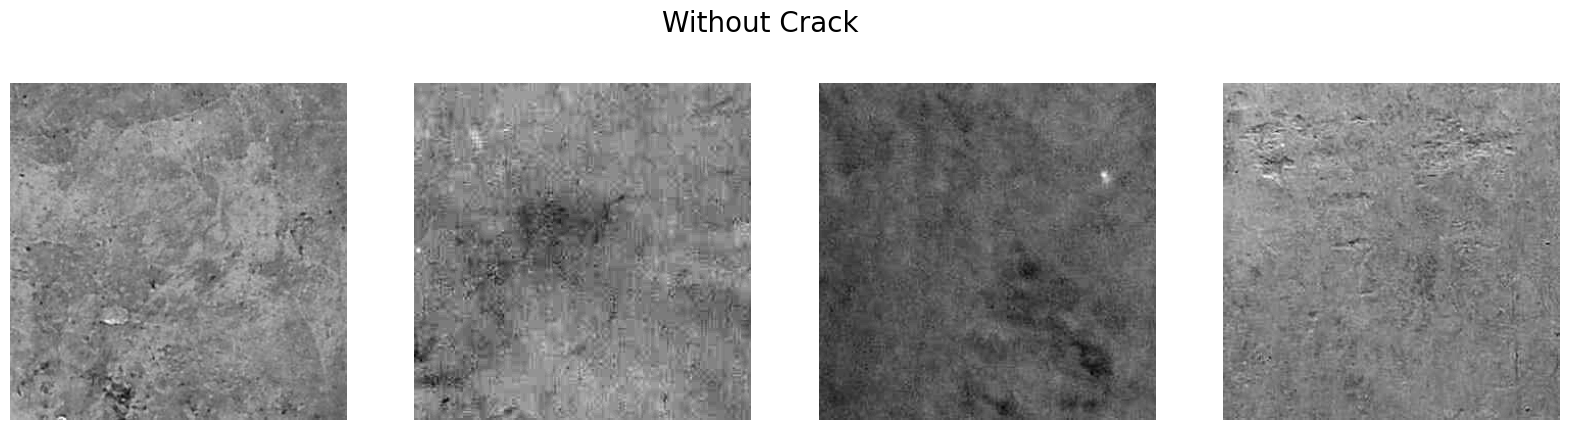

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Specify the root directory and the subfolders
root_dir = "/content/CICS"
subfolders = ["Multibranched Crack", "Simple Cracks", "Without Crack"]

# Display four example images from each class
for subfolder in subfolders:
    class_dir = os.path.join(root_dir, subfolder)
    image_files = [f for f in os.listdir(class_dir) if f.endswith(('.png', '.jpg', '.jpeg'))]

    fig, axs = plt.subplots(1, 4, figsize=(20, 5))
    fig.suptitle(subfolder, fontsize=20)

    for i in range(4):
        img = Image.open(os.path.join(class_dir, image_files[i])).convert('L')  # Convert to grayscale
        axs[i].imshow(img, cmap='gray')  # Use cmap='gray' to display as gray
        axs[i].axis('off')

    plt.show()

In [10]:
labels = ["Multibranched Crack", "Simple Cracks", "Without Crack"]
img_size = 128

def load_images(data_dir, labels):
    data = []
    class_labels = []
    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)  # Read the image as a color image
                resized_arr = cv2.resize(img_arr, (img_size, img_size))
                data.append(resized_arr)
                class_labels.append(class_num)
            except Exception as e:
                print(e)
    return np.array(data), np.array(class_labels)




In [11]:
# Load image dataset including all classes
Dataset, Labels = load_images(root_dir, labels)

In [12]:
x = []
y = []
img_size = 128
for feature, label in zip(Dataset, Labels):
    x.append(feature)
    y.append(label)

x = np.array(x).reshape(-1, img_size, img_size, 3)
x = x / 255
y = np.array(y)


In [13]:
del Dataset

In [14]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42,shuffle=True)

In [15]:
del x
del y

In [ ]:
import numpy as np

# Save the datasets to disk
np.save('X_train.npy', X_train)
np.save('X_test.npy', X_test)
np.save('y_train.npy', y_train)
np.save('y_test.npy', y_test)


In [16]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [17]:
#from keras.preprocessing.image import ImageDataGenerator

# Define the data augmentation operations
data_gen = ImageDataGenerator(
    rotation_range=15,
    zoom_range=0.15,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode="nearest"
)


# Create the training generator
train_generator = data_gen.flow(X_train, y_train,
    batch_size=256,
    shuffle=True
)
Val_datagen = ImageDataGenerator()
# Create the validation generator
val_generator = Val_datagen.flow(X_test, y_test,
    batch_size=256,
    shuffle=False
)


In [ ]:
del y_train
del y_test
del X_train
del X_test

# ViT

In [4]:
!pip uninstall -y tensorflow keras tensorflow-addons
!pip install tensorflow==2.10.0
!pip install keras==2.10.0
!pip install tensorflow-addons==0.16.1


Found existing installation: tensorflow 2.17.0
Uninstalling tensorflow-2.17.0:
  Successfully uninstalled tensorflow-2.17.0
Found existing installation: keras 3.4.1
Uninstalling keras-3.4.1:
  Successfully uninstalled keras-3.4.1
Found existing installation: tensorflow-addons 0.16.1
Uninstalling tensorflow-addons-0.16.1:
  Successfully uninstalled tensorflow-addons-0.16.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.0/578.0 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 82.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 65.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 82.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 39.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 106.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 45.7 MB/s eta 0:00

  Using cached tensorflow_addons-0.16.1-cp310-cp310-manylinux_2_12_x86_64.manylinux2010_x86_64.whl.metadata (1.8 kB)
Using cached tensorflow_addons-0.16.1-cp310-cp310-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (1.1 MB)


In [18]:
!pip install --quiet vit-keras
#!pip install tensorflow-addons==0.16.1
import tensorflow_addons as tfa
from vit_keras import vit

In [19]:
vit_model = vit.vit_b32(
        image_size = 128,
        activation = 'softmax',
        pretrained = True,
        include_top = False,
        pretrained_top = False,
        classes = 3)
from vit_keras import visualize



353253686/353253686 [==============================] - 10s 0us/step


In [20]:
ViTmodel = tf.keras.Sequential([
    vit_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(15, activation = tfa.activations.gelu, kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(3, activation = 'softmax', kernel_regularizer=tf.keras.regularizers.l2(0.01))
], name = 'vision_transformer')


ViTmodel.summary()

Model: "vision_transformer"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vit-b32 (Functional)        (None, 768)               87429888  
                                                                 
 flatten (Flatten)           (None, 768)               0         
                                                                 
 batch_normalization (BatchN  (None, 768)              3072      
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 15)                11535     
                                                                 
 dropout (Dropout)           (None, 15)                0         
                                                                 
 batch_normalization_1 (Batc  (None, 15)               60        
 hNormalization)                                

In [ ]:
learning_rate = 1e-4


optimizer = Adam(learning_rate = learning_rate)

ViTmodel.compile(optimizer = optimizer,
              loss = tf.keras.losses.CategoricalCrossentropy(label_smoothing = 0.2),
              metrics = ['accuracy'])

#STEP_SIZE_TRAIN = train_generator.n // 32
#STEP_SIZE_VALID = train_generator.n // 32

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'accuracy',
                                                 factor = 0.2,
                                                 patience = 2,
                                                 min_delta = 1e-4,
                                                 min_lr = 1e-6,
                                                 mode = 'max')

earlystopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy',
                                                 min_delta = 1e-4,
                                                 patience = 5,
                                                 mode = 'max',
                                                 restore_best_weights = True,
                                                 verbose = 1)

checkpointer = tf.keras.callbacks.ModelCheckpoint(filepath = './ViTmodel.h5',
                                                  monitor = 'val_accuracy',
                                                  save_best_only = True,
                                                  save_weights_only = True,
                                                  mode = 'max')

callbacks = [earlystopping, reduce_lr, checkpointer]

history2=ViTmodel.fit(x = train_generator,
          validation_data = val_generator,
          epochs = 50,
          callbacks = callbacks)

Epoch 1/50
38/38 [==============================] - 126s 2s/step - loss: 1.3177 - accuracy: 0.6852 - val_loss: 1.3056 - val_accuracy: 0.7621 - lr: 1.0000e-04
Epoch 2/50
38/38 [==============================] - 58s 2s/step - loss: 1.1613 - accuracy: 0.7790 - val_loss: 1.1222 - val_accuracy: 0.8496 - lr: 1.0000e-04
Epoch 3/50
38/38 [==============================] - 58s 2s/step - loss: 1.1183 - accuracy: 0.8092 - val_loss: 1.0088 - val_accuracy: 0.8988 - lr: 1.0000e-04
Epoch 4/50
38/38 [==============================] - 60s 2s/step - loss: 1.0713 - accuracy: 0.8464 - val_loss: 0.9590 - val_accuracy: 0.9275 - lr: 1.0000e-04
Epoch 5/50
38/38 [==============================] - 59s 2s/step - loss: 1.0452 - accuracy: 0.8602 - val_loss: 0.9317 - val_accuracy: 0.9354 - lr: 1.0000e-04
Epoch 6/50
38/38 [==============================] - 59s 2s/step - loss: 1.0113 - accuracy: 0.8808 - val_loss: 0.8648 - val_accuracy: 0.9550 - lr: 1.0000e-04
Epoch 7/50
38/38 [==============================] - 63s 2

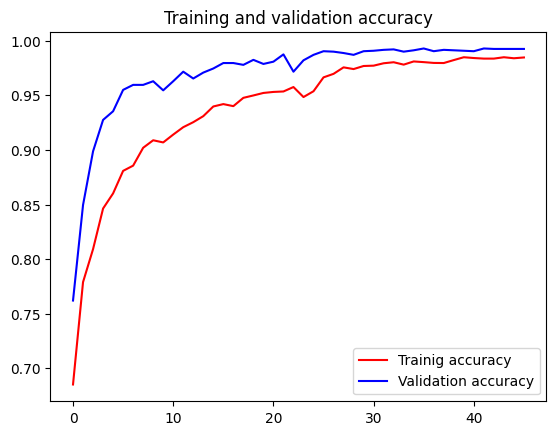

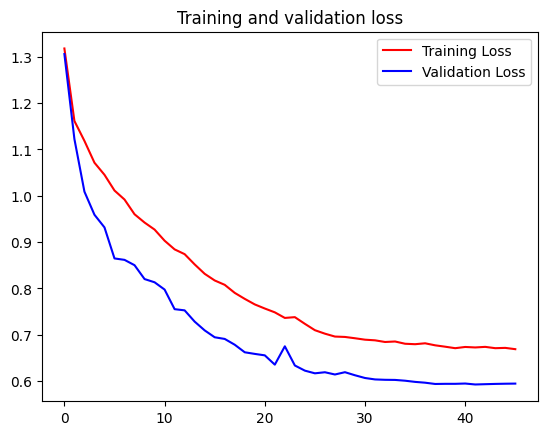

In [ ]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(len(acc))

# x-axis: epochs, y-axis: acc
plt.plot(epochs, acc, 'r', label='Trainig accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.legend()
#plt.ylim([0, 1])
plt.show()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
#plt.ylim([0, 2])
plt.legend()

plt.show()


                     precision    recall  f1-score   support

Multibranched Crack     0.9940    0.9988    0.9964       828
      Simple Cracks     0.9924    0.9873    0.9898       789
      Without Crack     0.9923    0.9923    0.9923       783

           accuracy                         0.9929      2400
          macro avg     0.9929    0.9928    0.9929      2400
       weighted avg     0.9929    0.9929    0.9929      2400



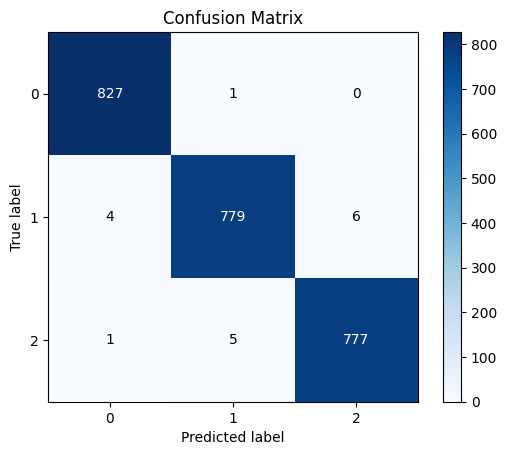

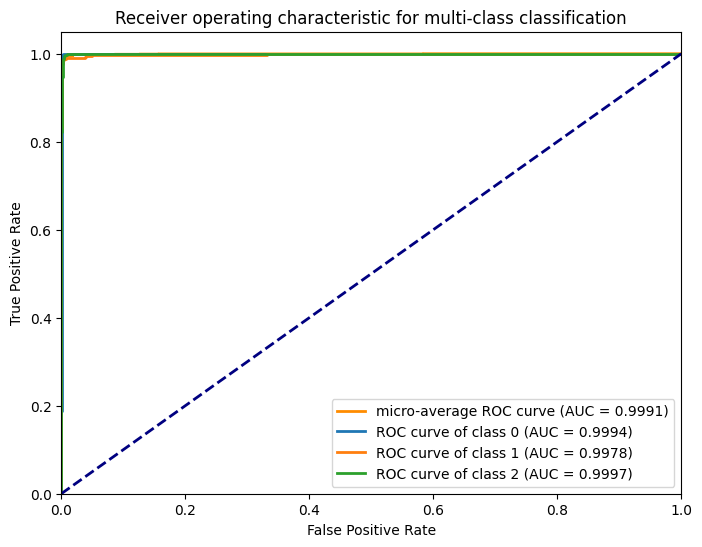

In [ ]:
# Get the true labels
y_true = []
for i in range(len(val_generator)):
    _, labels = val_generator[i]
    y_true.extend(np.argmax(labels, axis=1))

# Predict the labels
preds = ViTmodel.predict_generator(val_generator)
y_pred = np.argmax(preds, axis=1)

# Get the class names
target_names = ["Multibranched Crack", "Simple Cracks", "Without Crack"]

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Classification report
print(classification_report(y_true, y_pred, target_names=target_names,digits=4))

splt.plot_confusion_matrix(y_true,y_pred)

## ROC-AUC
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the labels
y_test_bin = label_binarize(y_true, classes=range(3))

# Compute predicted probabilities for each class
probs = preds

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and AUC
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), probs.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curves

plt.figure(figsize=(8, 6))
lw = 2
plt.plot(fpr["micro"], tpr["micro"], color='darkorange',
         lw=lw, label='micro-average ROC curve (AUC = {0:0.4f})'
         ''.format(roc_auc["micro"]))
for i in range(3):
    plt.plot(fpr[i], tpr[i], lw=lw,
             label='ROC curve of class {0} (AUC = {1:0.4f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class classification')
plt.legend(loc="lower right")
plt.show()

In [ ]:
ViTmodel.load_weights('/content/drive/MyDrive/ViTmodel_Multi.h5')

1/1 [==============================] - 3s 3s/step


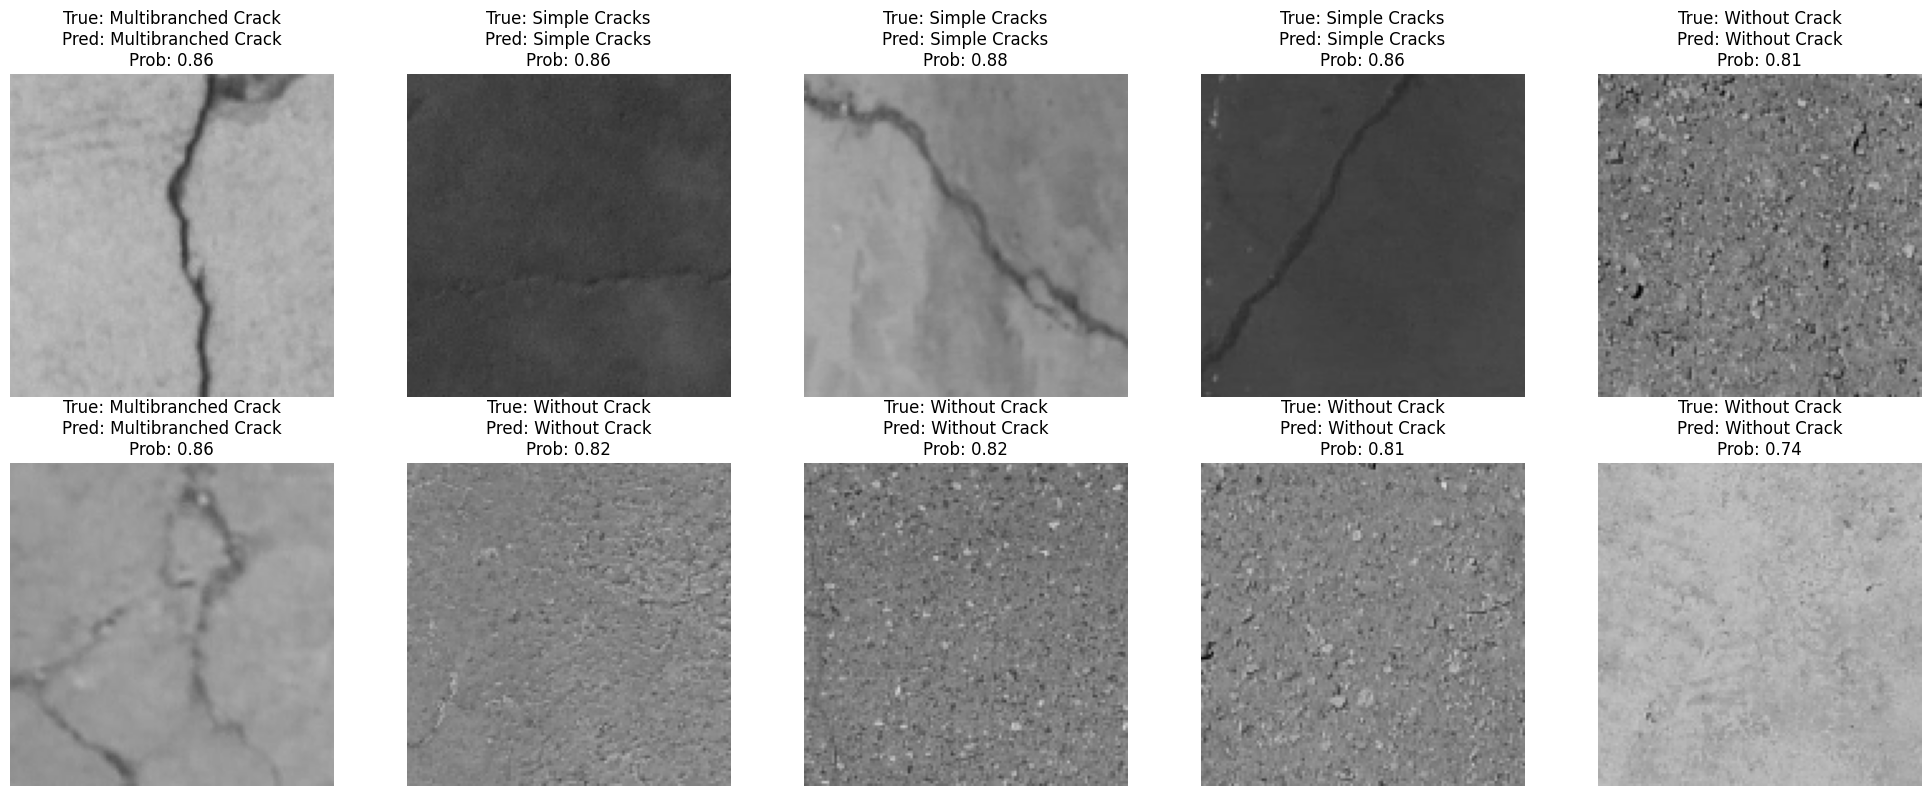

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# Mapping of class indices to class labels
class_labels = ['Multibranched Crack', 'Simple Cracks','Without Crack']

# Get 10 images and labels from the validation generator
images, labels = [], []
for i in range(10):
    img, lbl = val_generator.next()
    images.append(img[0])
    labels.append(lbl[0])

# Convert to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Make predictions
predictions = ViTmodel.predict(images)

# Plot the images along with their predicted probabilities and classes
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.flatten()
for i, ax in enumerate(axes):
    ax.imshow(images[i])
    pred_prob = predictions[i]
    pred_class = np.argmax(pred_prob)
    true_class = np.argmax(labels[i])

    title = f"True: {class_labels[true_class]}\nPred: {class_labels[pred_class]}\nProb: {pred_prob[pred_class]:.2f}"
    ax.set_title(title)
    ax.axis('off')

plt.tight_layout()
plt.show()


1/1 [==============================] - 1s 529ms/step


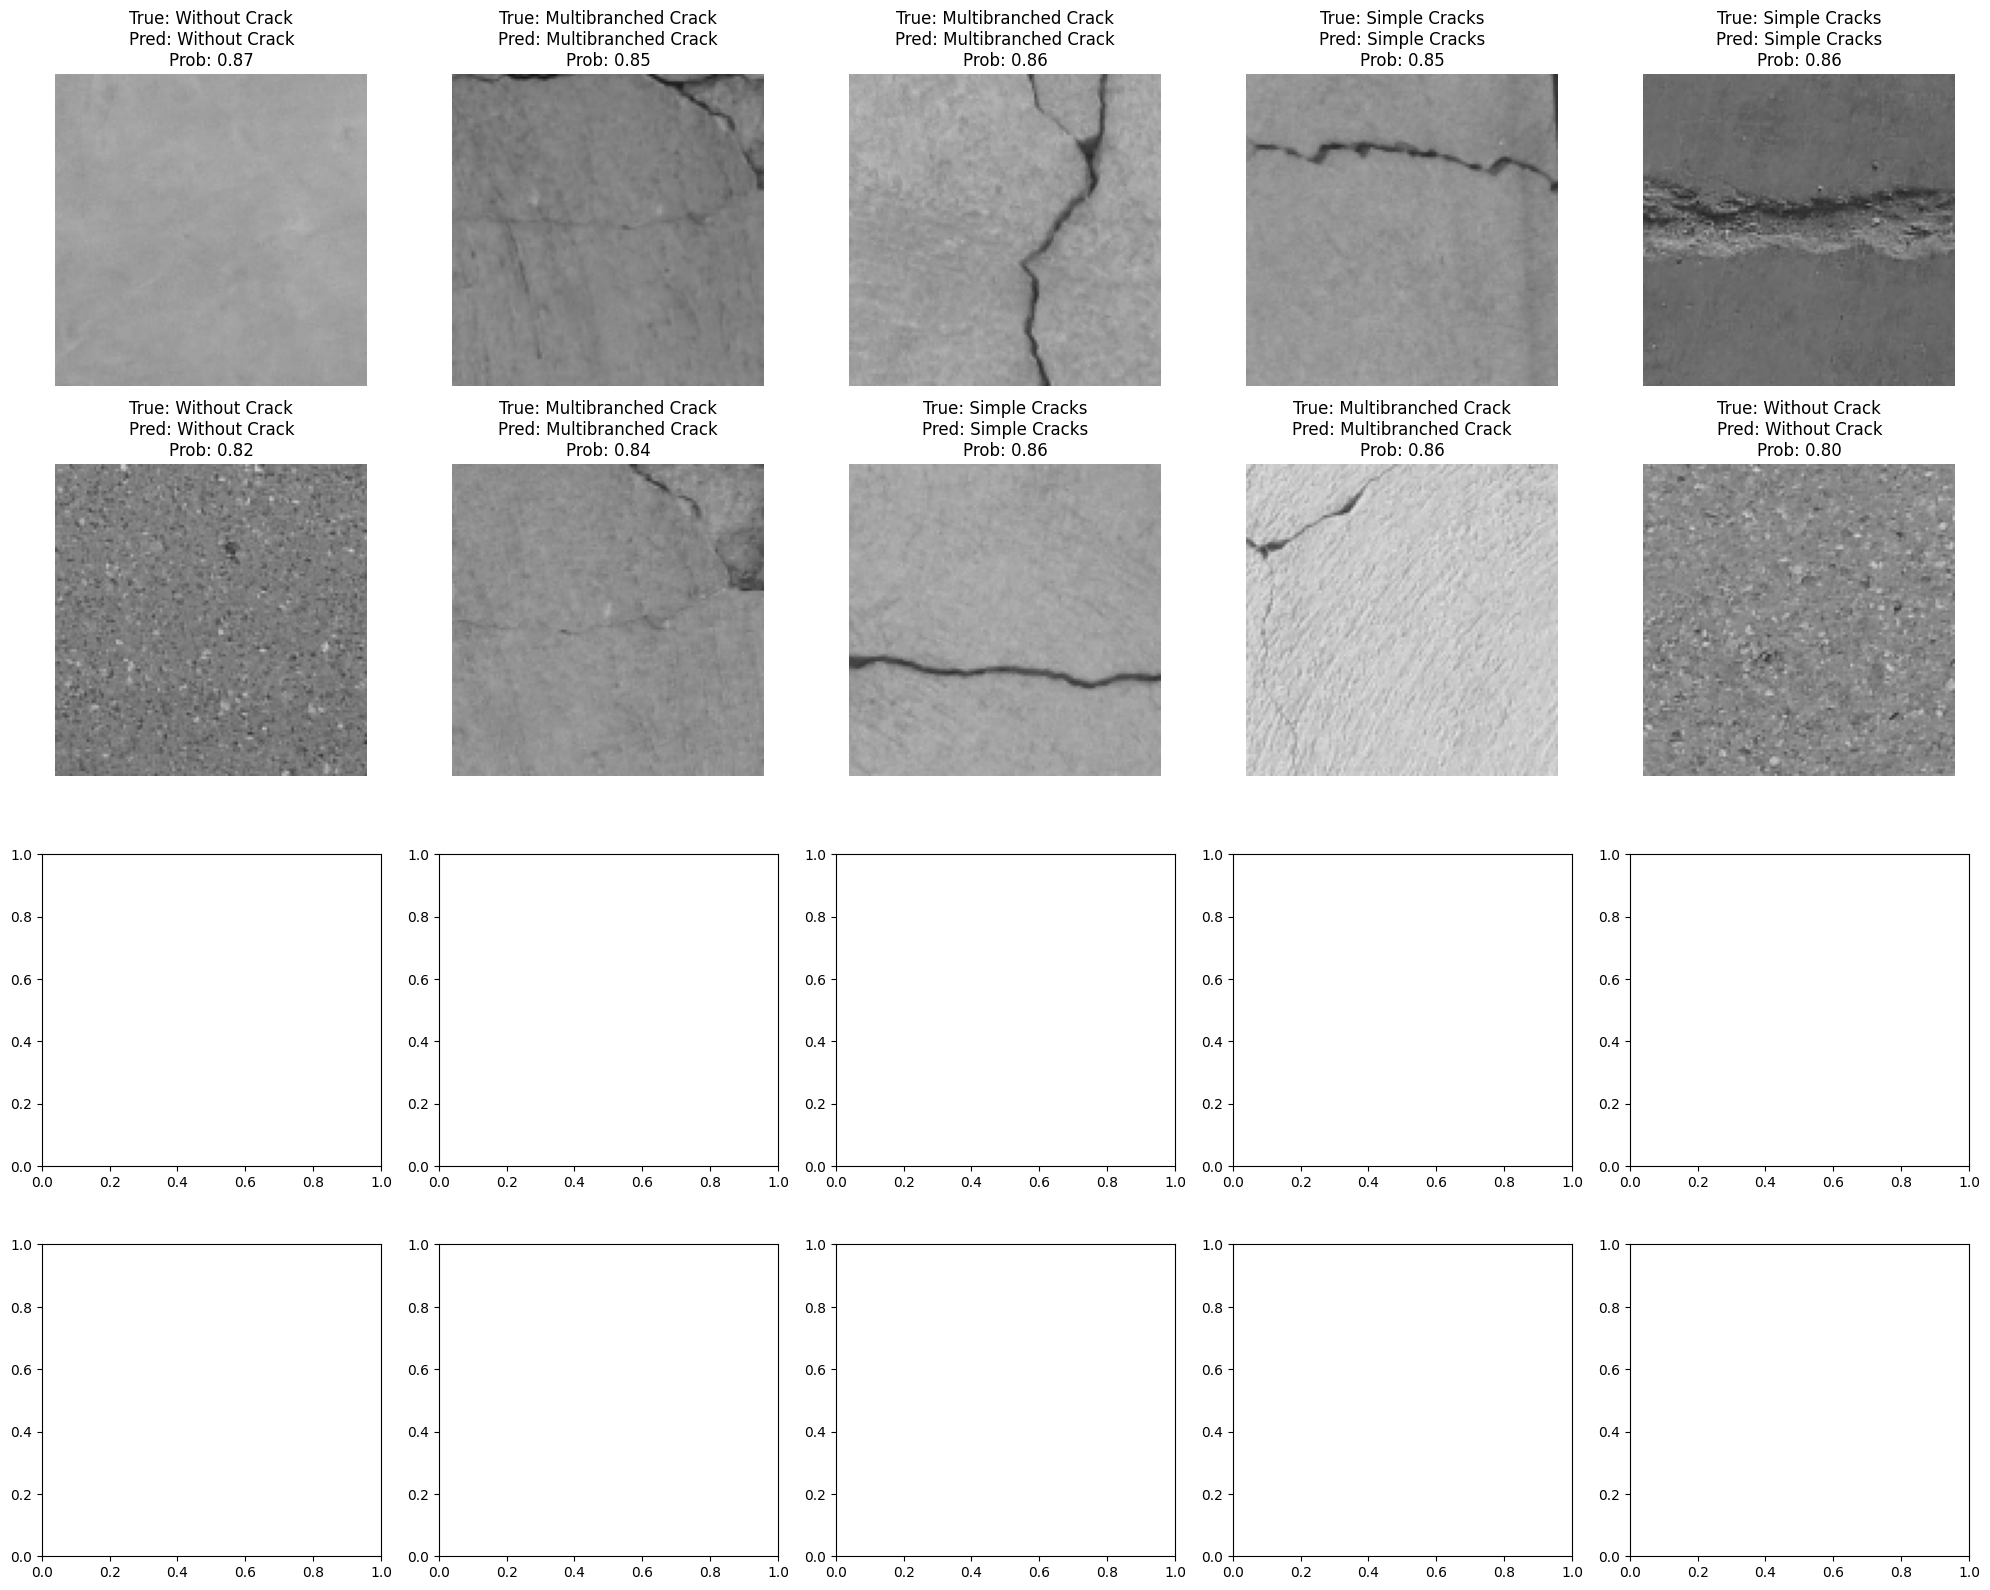

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# Mapping of class indices to class labels
class_labels = ['Multibranched Crack', 'Simple Cracks','Without Crack']

# Indices of the error samples
error_indices = [25,26,27,28,29,30,50,60,70,72]

# Fetch the images and labels for the error samples
images = []
labels = []
for idx in error_indices:
    val_generator.batch_index = idx // val_generator.batch_size
    img, lbl = val_generator.next()
    images.append(img[idx % val_generator.batch_size])
    labels.append(lbl[idx % val_generator.batch_size])

# Convert to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Make predictions
predictions = ViTmodel.predict(images)

# Plot the images along with their predicted probabilities and classes
fig, axes = plt.subplots(4, 5, figsize=(20, 16))
axes = axes.flatten()
for i, ax in enumerate(axes[:len(error_indices)]):
    ax.imshow(images[i])
    pred_prob = predictions[i]
    pred_class = np.argmax(pred_prob)
    true_class = np.argmax(labels[i])

    title = f"True: {class_labels[true_class]}\nPred: {class_labels[pred_class]}\nProb: {pred_prob[pred_class]:.2f}"
    ax.set_title(title)
    ax.axis('off')

plt.tight_layout()
plt.show()


1/1 [==============================] - 1s 1s/step


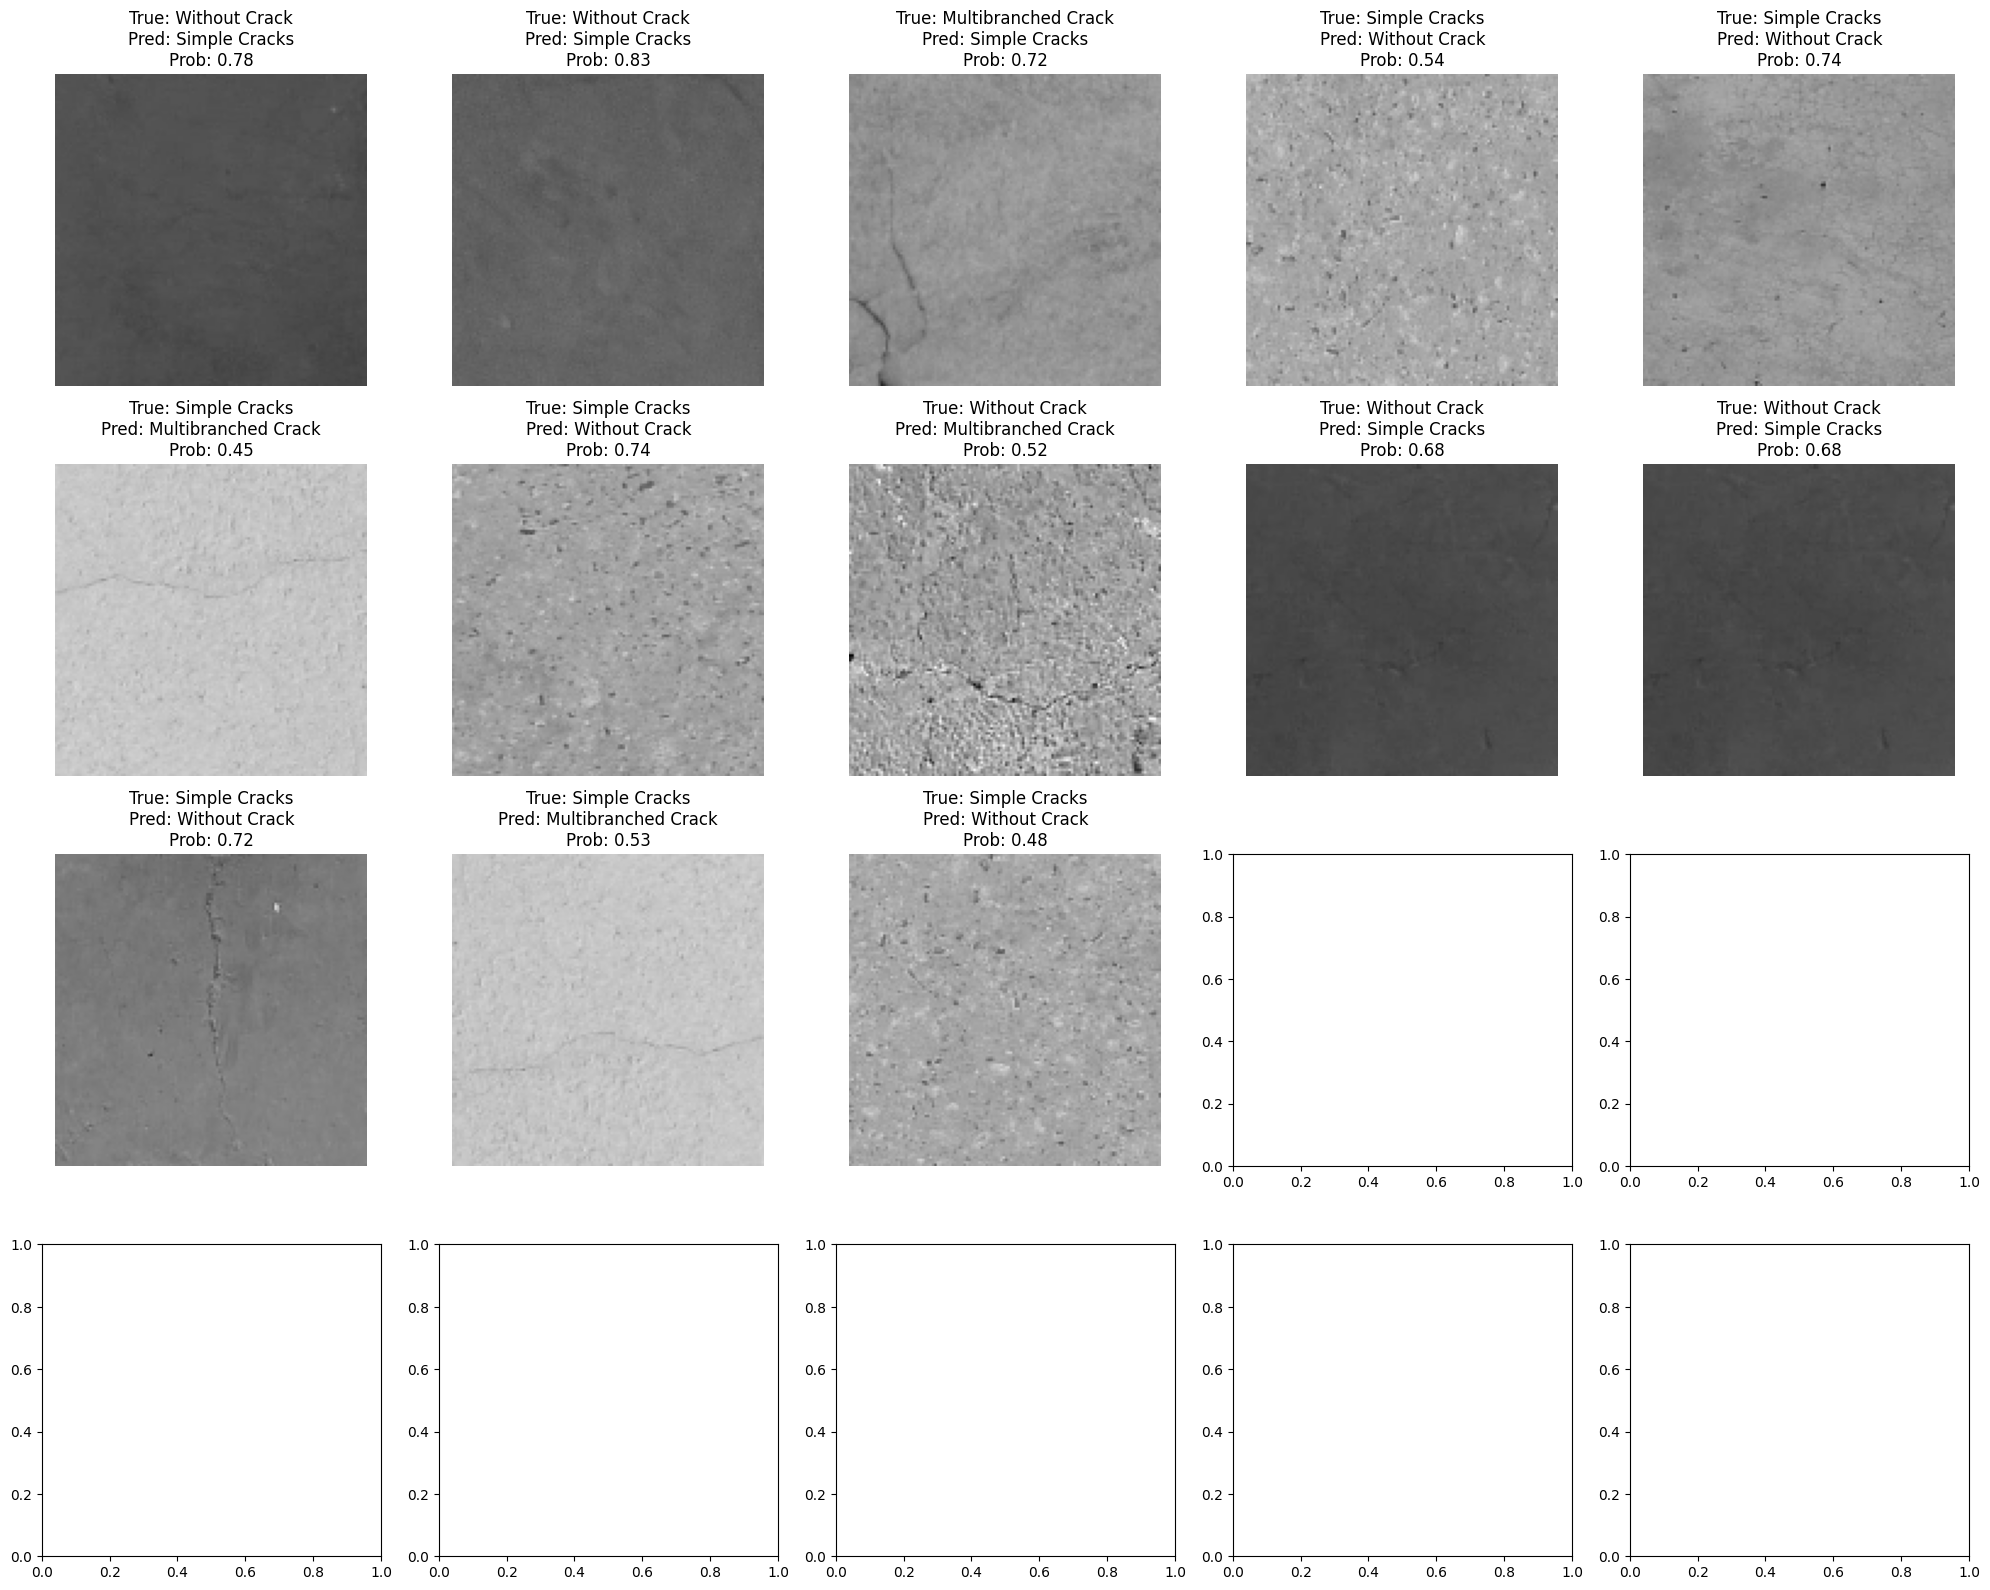

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# Mapping of class indices to class labels
class_labels = ['Multibranched Crack', 'Simple Cracks','Without Crack']

# Indices of the error samples
error_indices = [92, 132, 148, 300, 339, 467, 1050, 1393, 1592, 1650, 1803, 2188, 2358]

# Fetch the images and labels for the error samples
images = []
labels = []
for idx in error_indices:
    val_generator.batch_index = idx // val_generator.batch_size
    img, lbl = val_generator.next()
    images.append(img[idx % val_generator.batch_size])
    labels.append(lbl[idx % val_generator.batch_size])

# Convert to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Make predictions
predictions = ViTmodel.predict(images)

# Plot the images along with their predicted probabilities and classes
fig, axes = plt.subplots(4, 5, figsize=(20, 16))
axes = axes.flatten()
for i, ax in enumerate(axes[:len(error_indices)]):
    ax.imshow(images[i])
    pred_prob = predictions[i]
    pred_class = np.argmax(pred_prob)
    true_class = np.argmax(labels[i])

    title = f"True: {class_labels[true_class]}\nPred: {class_labels[pred_class]}\nProb: {pred_prob[pred_class]:.2f}"
    ax.set_title(title)
    ax.axis('off')

plt.tight_layout()
plt.show()
